In [151]:
import numpy as np
import pandas as pd
import pickle
data =pd.read_csv('CVD22.csv')
data.head()


,Age,Gender,Weight,Limited_access_ to_healthcare,CVD_knowledge(1-5),Blood_pressure,Excercise,Smoking,Alcohol_Consumption,Fastfood_consumption?,CVD,FamilyMembers
0,0.0,0.0,85.0,0.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0
1,0.0,1.0,95.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
2,0.0,0.0,86.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
3,0.0,1.0,60.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,54.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0


In [152]:
!pip install  pyAgrum



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
import os, random
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
import pandas as pd

In [154]:
!pip install graphviz


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [157]:
print(data.columns)

Index(['Age', 'Gender', 'Weight', 'Limited_access_ to_healthcare',
       'CVD_knowledge(1-5)', 'Blood_pressure', 'Excercise', 'Smoking',
       ' Alcohol_Consumption', 'Fastfood_consumption?', 'CVD',
       ' FamilyMembers'],
      dtype='object')


In [158]:
X = data.drop(columns=["CVD", "Age"])
y = data["CVD"]

In [159]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer


In [160]:
print(y.value_counts())


CVD
0.0    146
1.0     15
Name: count, dtype: int64


In [161]:
print(X.shape, y.shape)
print(type(X), type(y))

(183, 10) (183,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [162]:
print(X.isnull().sum())
print(y.isnull().sum())


Gender                           22
Weight                           22
Limited_access_ to_healthcare    22
CVD_knowledge(1-5)               22
Blood_pressure                   22
Excercise                        22
Smoking                          22
 Alcohol_Consumption             22
Fastfood_consumption?            22
 FamilyMembers                   22
dtype: int64
22


In [163]:
# Impute missing values in 'Weight' column with mean
imputer = SimpleImputer(strategy='mean')
data['Weight'] = imputer.fit_transform(data[['Weight']])
print (X)

     Gender  Weight  Limited_access_ to_healthcare  CVD_knowledge(1-5)  \
0       0.0    85.0                            0.0                 2.0   
1       1.0    95.0                            1.0                 1.0   
2       0.0    86.0                            1.0                 1.0   
3       1.0    60.0                            1.0                 1.0   
4       1.0    54.0                            1.0                 1.0   
..      ...     ...                            ...                 ...   
178     NaN     NaN                            NaN                 NaN   
179     NaN     NaN                            NaN                 NaN   
180     NaN     NaN                            NaN                 NaN   
181     NaN     NaN                            NaN                 NaN   
182     NaN     NaN                            NaN                 NaN   

     Blood_pressure  Excercise  Smoking   Alcohol_Consumption  \
0               1.0        2.0      0.0       

In [164]:
print(y.isnull().sum())  # This will print the number of missing values in y
X = X[~y.isnull()]
y = y.dropna()

22


In [165]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)


In [166]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input + first hidden layer
    Dropout(0.2),   #Prevent overfitting
    Dense(64, activation='relu'),  
    Dropout(0.2),
    Dense(32, activation='relu'),  
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Output layer 
])

c:\Users\BT_Lab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [168]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [169]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping], 
                    verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7220 - loss: 0.8415 - val_accuracy: 0.9615 - val_loss: 0.2499
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8524 - loss: 0.7823 - val_accuracy: 0.9615 - val_loss: 0.2456
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8771 - loss: 0.8764 - val_accuracy: 0.9615 - val_loss: 0.2084
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8831 - loss: 0.5094 - val_accuracy: 0.9615 - val_loss: 0.2052
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7848 - loss: 0.6534 - val_accuracy: 0.9615 - val_loss: 0.2351
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7744 - loss: 0.7126 - val_accuracy: 0.9615 - val_loss: 0.2278
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7887 - loss: 0.5652 - val_accuracy: 0.9615 - val_loss: 0.2102
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7922 - loss: 0.7381 - val_accuracy: 0.9615 - val_loss:

In [170]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9081 - loss: 0.3714
Test Loss: 0.3689, Test Accuracy: 0.9091


In [171]:
y_pred_proba = model.predict(X_test)  # Probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Binary predictions

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000028CDE266200> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


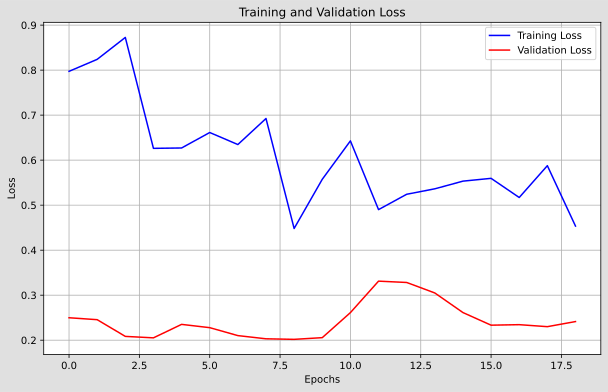

In [176]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        30
         1.0       0.00      0.00      0.00         3

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33



c:\Users\BT_Lab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BT_Lab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BT_Lab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [173]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[30  0]
 [ 3  0]]


In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


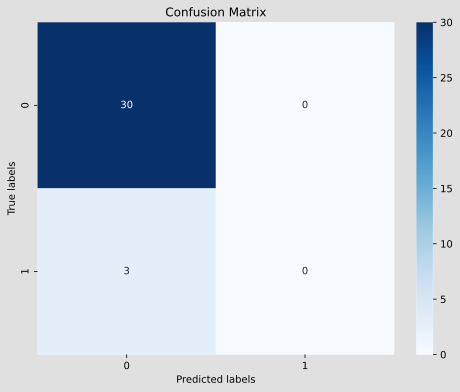

In [175]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()